In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pytrends.request as pr
import geopandas as gpd

In [21]:
pytrends = pr.TrendReq(hl='en-US', tz=360)

kw_list = ["AI"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')



c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


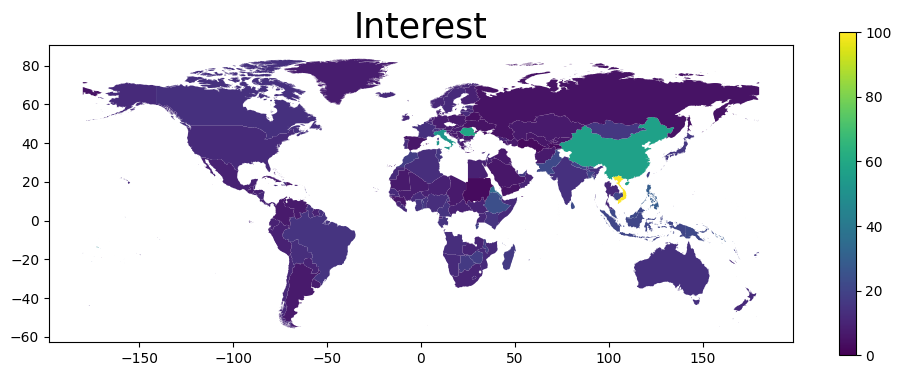

In [147]:
# Setting the path to the shapefile
SHAPEFILE = 'world-administrative-boundaries\world-administrative-boundaries.shp'
# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)

boolCountryExists = []
countries = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)["AI"].keys()
for country in geo_df["name"]:
    if country in countries:
        boolCountryExists.append(True)
    else:
        boolCountryExists.append(False)
geo_df = geo_df[boolCountryExists].sort_values(by="name")

boolCountryExists = []
country_exists = list(geo_df["name"])
country_data = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)["AI"]
for country in country_data.keys():
    if country in country_exists:
        boolCountryExists.append(True)
    else:
        boolCountryExists.append(False)
country_data = country_data[boolCountryExists].sort_index()
geo_df["interest"] = country_data.values

geo_df = geo_df.drop(geo_df.loc[geo_df['name'] == 'Antarctica'].index)

fix_df = gpd.read_file(SHAPEFILE)
america_row = fix_df[fix_df["name"] == "United States of America"]
countries = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)["AI"]
america_row["interest"] = countries["United States"]
geo_df = pd.concat([geo_df, america_row], ignore_index=True)

russia_row = fix_df[fix_df["name"] == "Russian Federation"]
russia_row["interest"] = countries["Russia"]
geo_df = pd.concat([geo_df, russia_row], ignore_index=True)

geo_df.plot(column="interest", legend=True, figsize=[12,12], legend_kwds={
        "shrink":.35
    },
)

# Print the map
# Set the range for the choropleth
title = 'Interest'
col = 'interest'
vmin = geo_df[col].min()
vmax = geo_df[col].max()
# Add a title
plt.title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))

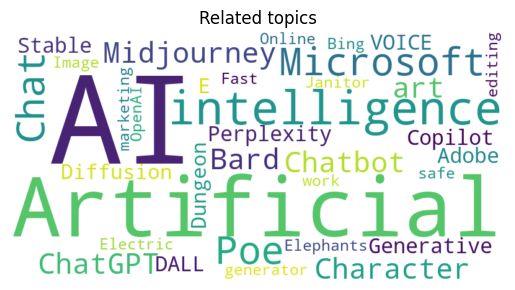

In [50]:

from wordcloud import WordCloud

# join the lemmatized words into a single string
wordcloud_text = ' '.join(list(pytrends.related_topics()["AI"]["rising"]["topic_title"]))

# create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# display the word cloud
plt.title("Related topics")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

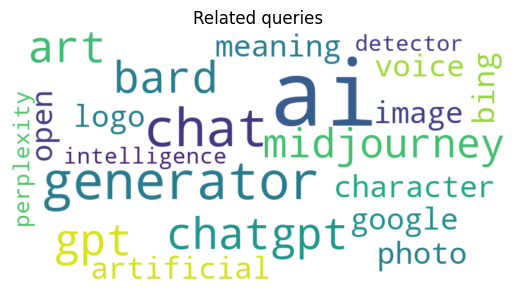

In [54]:
# join the lemmatized words into a single string
wordcloud_text = ' '.join(list(pytrends.related_queries()["AI"]["top"]["query"]))

# create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# display the word cloud
plt.title("Related queries")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

C:\Users\Ashley\AppData\Local\Temp\ipykernel_19952\2944914874.py:10: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


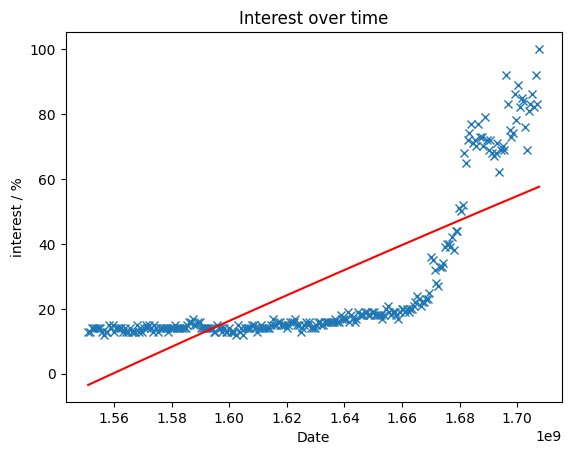

In [161]:
dates = pytrends.interest_over_time().index
ts = np.array([t.timestamp() for t in dates])
interest = pytrends.interest_over_time()["AI"].values
plt.plot(ts, interest, marker="x", linestyle='None')
plt.title("Interest over time")
plt.ylabel("interest / %")
plt.xlabel("Date")

def exp(x, a, b, c):
    return a * np.log(b * x) + c

from scipy.optimize import curve_fit

popt, pcov = curve_fit(exp, ts, interest)
plt.plot(ts, exp(ts, *popt), 'r-',
         label="fit")
